<a href="https://colab.research.google.com/github/chandan2311/Machine-learning/blob/main/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-06-24 17:08:34--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 172.217.214.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   235MB/s    in 0.6s    

2023-06-24 17:08:34 (235 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [3]:
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [4]:
import os
train_horse_dir=os.path.join('./horse-or-human/horses')
train_human_dir=os.path.join('./horse-or-human/humans')

In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse46-7.png', 'horse33-5.png', 'horse26-9.png', 'horse20-2.png', 'horse29-0.png', 'horse06-4.png', 'horse10-6.png', 'horse27-7.png', 'horse03-9.png', 'horse34-1.png']
['human16-19.png', 'human07-12.png', 'human09-01.png', 'human16-01.png', 'human08-27.png', 'human10-01.png', 'human12-07.png', 'human10-13.png', 'human10-07.png', 'human07-29.png']


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows=4
ncols=4
pic_index=0

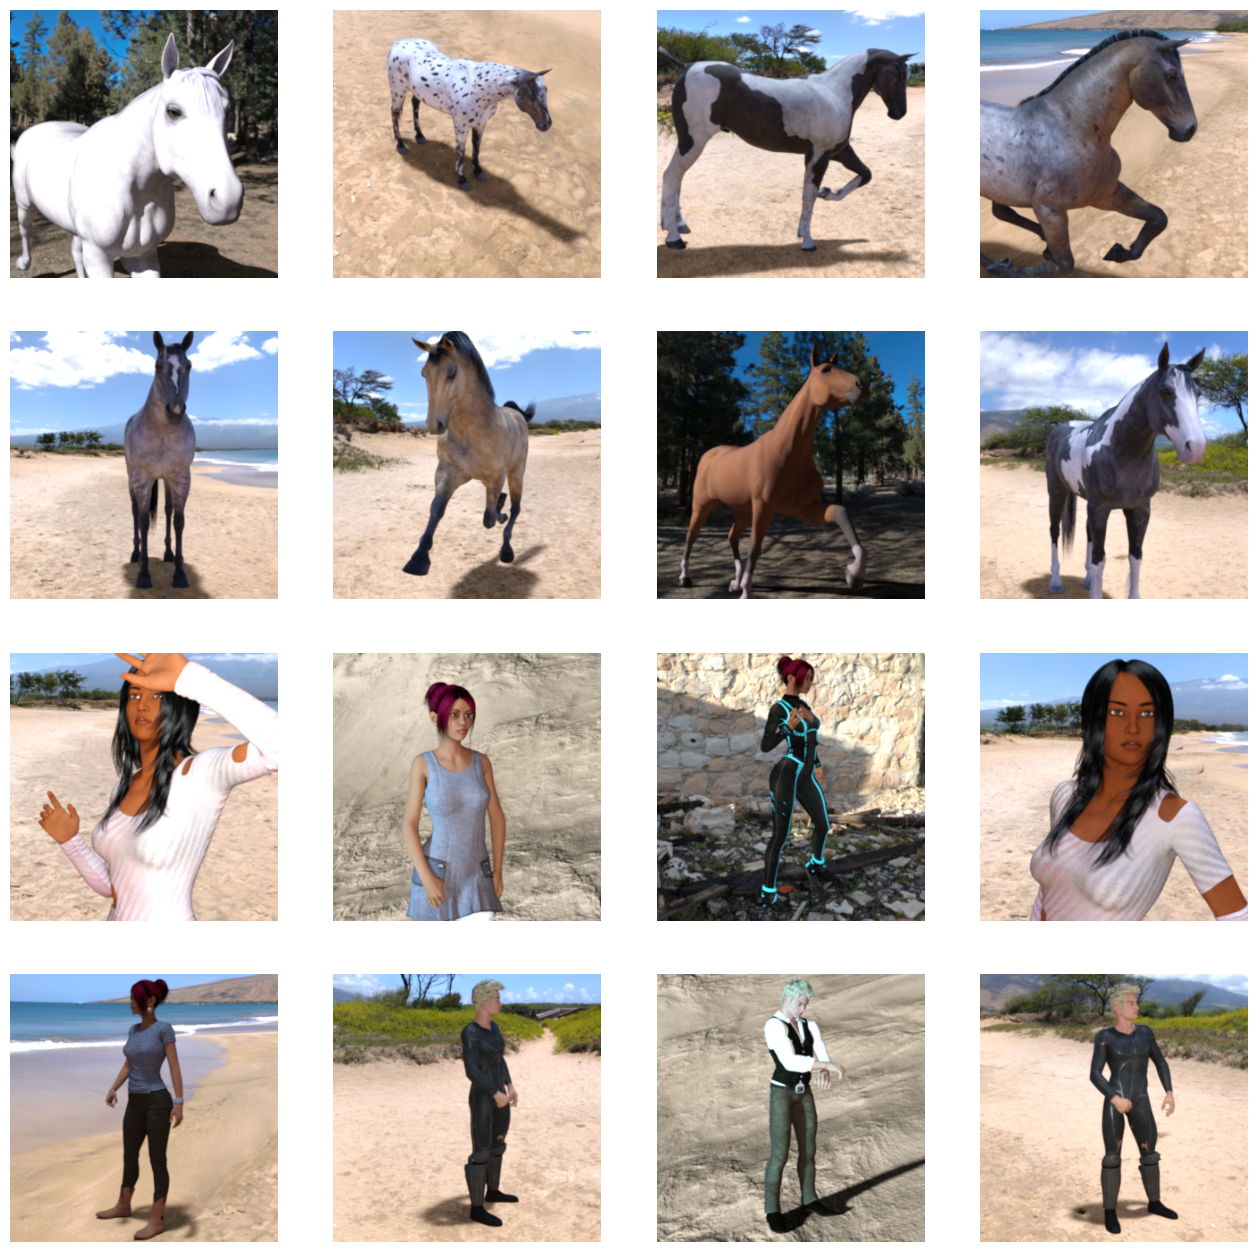

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):

  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
import tensorflow as tf


In [9]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f94664be9e0>>

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(1./255.0)

In [13]:
train_generator=train_datagen.flow_from_directory(
    './horse-or-human/',target_size=(300,300),batch_size=128,class_mode='binary')

Found 1027 images belonging to 2 classes.


In [14]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/15
8/8 [==============================] - 21s 861ms/step - loss: 4.4859 - accuracy: 0.5128
Epoch 2/15
8/8 [==============================] - 7s 797ms/step - loss: 0.7065 - accuracy: 0.6073
Epoch 3/15
8/8 [==============================] - 6s 753ms/step - loss: 0.4034 - accuracy: 0.8209
Epoch 4/15
8/8 [==============================] - 8s 913ms/step - loss: 0.1498 - accuracy: 0.9521
Epoch 5/15
8/8 [==============================] - 8s 935ms/step - loss: 0.0685 - accuracy: 0.9746
Epoch 6/15
8/8 [==============================] - 7s 793ms/step - loss: 0.0143 - accuracy: 0.9978
Epoch 7/15
8/8 [==============================] - 6s 762ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 8/15
8/8 [==============================] - 7s 763ms/step - loss: 0.6536 - accuracy: 0.9066
Epoch 9/15
8/8 [==============================] - 7s 836ms/step - loss: 0.8988 - accuracy: 0.7475
Epoch 10/15
8/8 [==============================] - 6s 758ms/step - loss: 0.1876 - accuracy: 0.9499
Epoch 11/15
8/8 [=

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")